## Part 2 - Camera Intrinsics and Image Formation

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
from utils import *

In [2]:
# define parameters
# points
n_points = 6
xlim = (-5, 5)
ylim = (-5, 5)
elevation = 5

# image plane
img_size = (7, 7)
f = 2

In [3]:
points = create_same_plane_points(n_points, xlim, ylim, elevation)
xx, yy, Z = create_image_grid(f, img_size)

Text(0.5, 0, 'Z-axis')

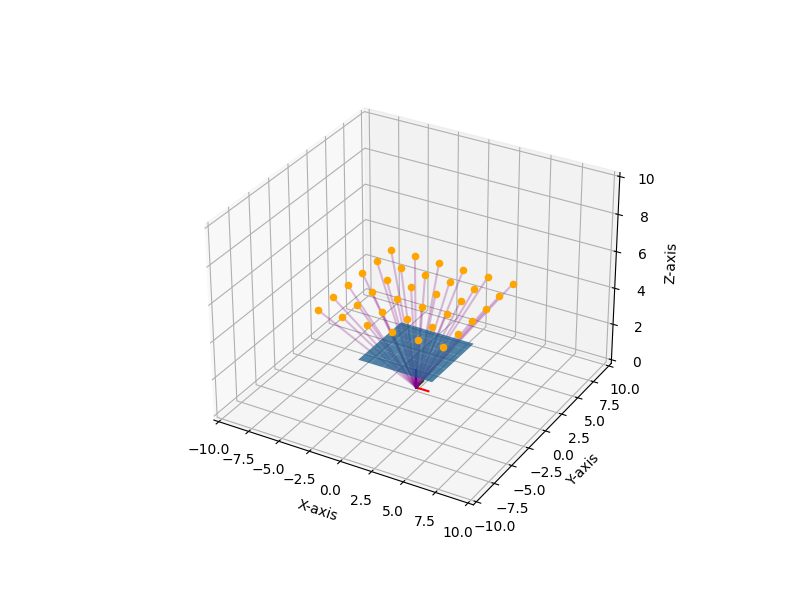

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# plot image plane
ax.plot_surface(xx, yy, Z, alpha=0.75)

ax.set(xlim=(-10, 10), ylim=(-10, 10), zlim=(0, 10))
ax = pr.plot_basis(ax)

# plot the points
c = 0
for i in range(n_points):
    for j in range(n_points):
        point = points[:, c]
        ax.scatter(*point, color="orange")
        ax.plot(*make_line(origin, point), color="purple", alpha=0.25)
        c += 1
        
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

### Camera Intrinsics and Image formation

In [5]:
types = ["ideal", "skewed", "rectangular pixels", "offset"]
K1 = compute_intrinsic_parameter_matrix(2, 0, 1, 0, 0) # normal / ideal
K2 = compute_intrinsic_parameter_matrix(2, 1, 1, 0, 0) # skewed
K3 = compute_intrinsic_parameter_matrix(2, 0, 2, 0, 0) # rectangular pixels
K4 = compute_intrinsic_parameter_matrix(2, 0, 1, 1, 1) # offset

projection_points1 = compute_image_projection(points, K1)
projection_points2 = compute_image_projection(points, K2)
projection_points3 = compute_image_projection(points, K3)
projection_points4 = compute_image_projection(points, K4)

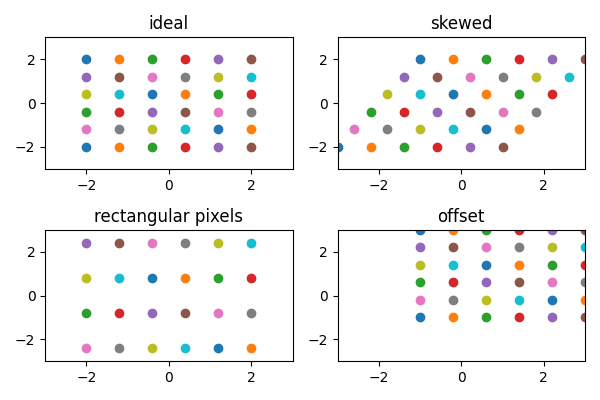

In [6]:
h, w = img_size
nrows = 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 4))

c = 1
for i in range(ncols):
    for j in range(nrows):
        ax = axes[i][j]
        ax.set(xlim = (-(h // 2), w // 2), ylim = (-(h // 2), w // 2))
        ax.set_title(types[c-1])
        for k in range(n_points * n_points):
                ax.scatter(*eval(f"projection_points{c}")[:, k])
        c += 1

plt.tight_layout()

### Transforming the image plane

In [7]:
# 1. extract image plane points
h_grid = convert_grid_to_homogeneous(xx, yy, Z, img_size)
h_grid = h_grid[:-1, :] # remove last row as we do not need homogeneous points

# 2. transform the image plane points
K_ = K2.copy()
K_[:2, :2] = 1/f * K_[:2, :2] # nullify the effect of focal length
Kinv = np.linalg.inv(K_) # the transformation matrix is the inverse of the change of basis matrix
img_plane_points_transformed = Kinv @ h_grid

xxt, yyt, Zt = convert_homogeneous_to_grid(img_plane_points_transformed, img_size)

Text(0.5, 0, 'Z-axis')

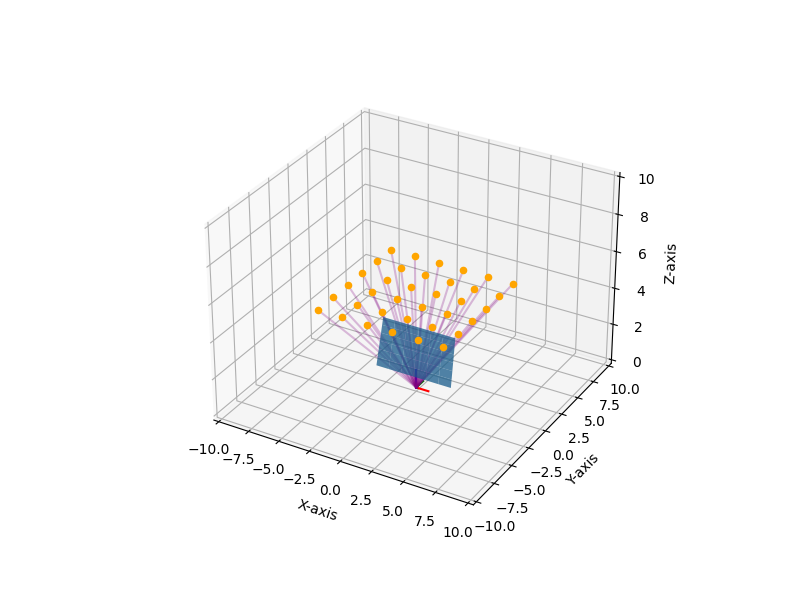

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111,projection='3d')

# plot image plane
ax.plot_surface(xxt, yyt, Zt, alpha=0.75)

ax.set(xlim=(-10, 10), ylim=(-10, 10), zlim=(0, 10))
ax = pr.plot_basis(ax)

# plot the points
c = 0
for i in range(n_points):
    for j in range(n_points):
        point = points[:, c]
        ax.scatter(*point, color="orange")
        ax.plot(*make_line(origin, point), color="purple", alpha=0.25)
        c += 1
        
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")